In [1]:
# importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
## Loading data into the sheet
df=pd.read_csv(r"D:\Projects\ML\loan_approval_dataset.csv")

In [3]:
# checking first 2 rows of the data
df.head(2)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   

   loan_status  
0     Approved  
1     Rejected

In [4]:
# checking how many rows and columns are there in the dataset
print(f"No. of rows: {df.shape[0]}")
print(f"No. of columns: {df.shape[1]}")
# We can see that there are 4269 rows and 13 columns in the dataset

No. of rows: 4269
No. of columns: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


It can be observed that thre are total 13 columns and there are 3 columns with object type of datatype, and rest 10 columns are with integer datatype

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There are no null values in the dataset

In [7]:
df.duplicated().sum()

0

There are no duplicates either.

In [8]:
# All column names
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# EDA
### Univariate Analysis

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\3704533142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["loan_id"])


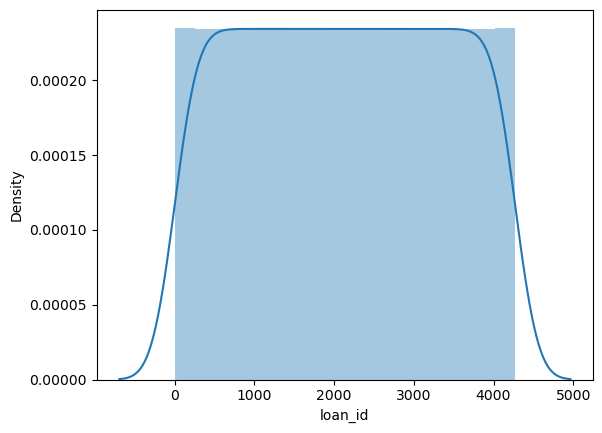

In [9]:
sns.distplot(df["loan_id"])
plt.show()

In [10]:
df["loan_id"].nunique()

4269

In [11]:
df.drop(columns="loan_id", inplace=True)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\3524164572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[" no_of_dependents"])


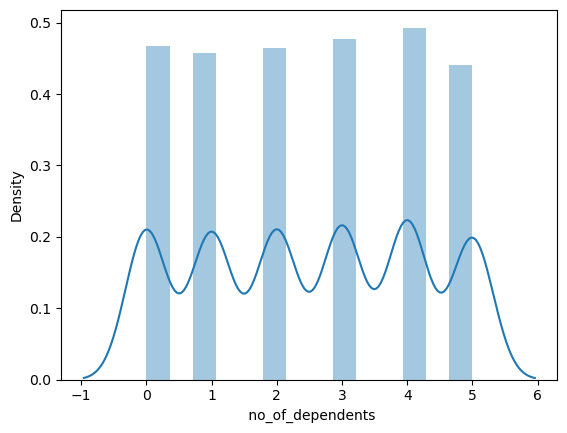

In [12]:
sns.distplot(df[" no_of_dependents"])
plt.show()

In [13]:
df[' education'].nunique()

2

In [14]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [15]:
df[" education"].value_counts(dropna=False)

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

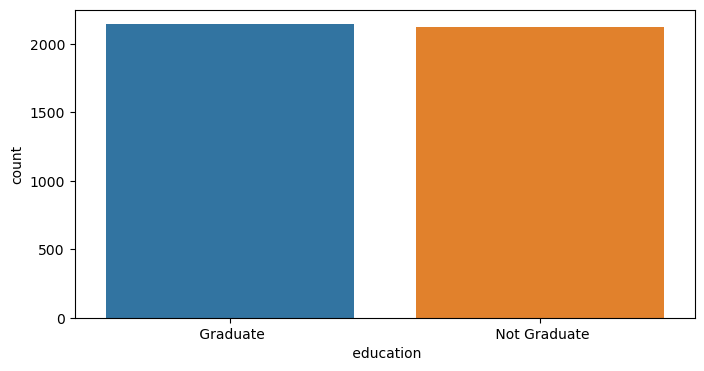

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x=" education",data=df)
plt.show()

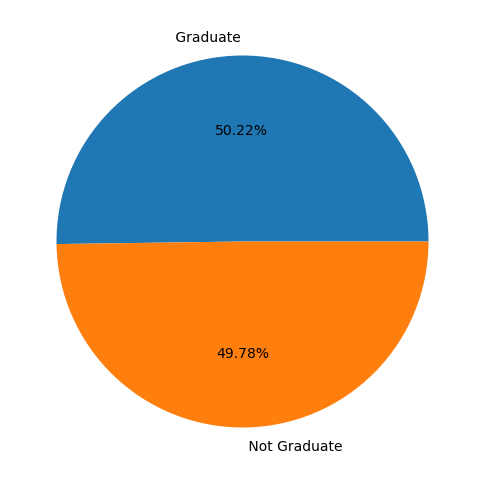

In [17]:
plt.figure(figsize=(6,8))
plt.pie(df[" education"].value_counts().values,labels=df[" education"].value_counts().index,autopct="%1.2f%%")
plt.show()

- There are 50.22% who all are graduate.
- There are 49.78% who all are not graduate.

In [18]:
df[' self_employed'].nunique()

2

In [19]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [20]:
df[' self_employed'].value_counts(dropna=False)

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

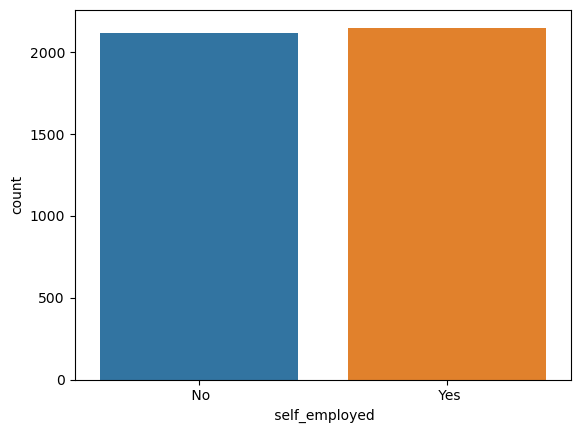

In [21]:
sns.countplot(x=' self_employed',data=df)
plt.show()

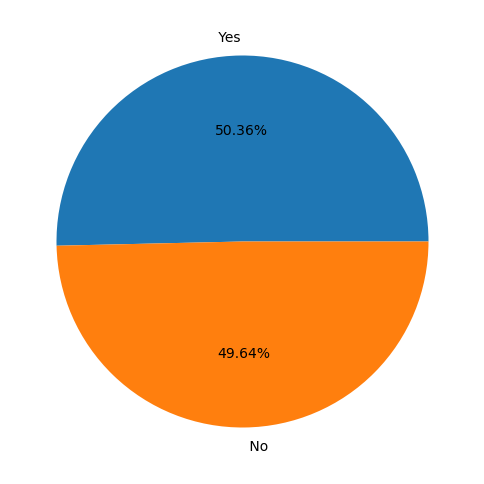

In [22]:
plt.figure(figsize=(6,8))
plt.pie(x=df[' self_employed'].value_counts().values,labels=df[' self_employed'].value_counts().index,autopct="%1.2f%%")
plt.show()

- There are 50.36% of people who are self employed
- There are 49.64% of people who are not self employed

In [23]:
df[' income_annum'].nunique()

98

In [24]:
df[' income_annum'].unique()

array([9600000, 4100000, 9100000, 8200000, 9800000, 4800000, 8700000,
       5700000,  800000, 1100000, 2900000, 6700000, 5000000, 1900000,
       4700000,  500000, 2700000, 6300000, 5800000, 6500000, 4900000,
       3100000, 2400000, 7000000, 9000000, 8400000, 1700000, 1600000,
       8000000, 3600000, 1500000, 7800000, 1400000, 4200000, 5500000,
       9500000, 7300000, 3800000, 5100000, 4300000, 9300000, 7400000,
       8500000, 8800000, 3300000, 3900000, 8300000, 5600000, 5300000,
       2600000,  700000, 3500000, 9900000, 3000000, 6800000, 2000000,
       1000000,  300000, 6600000, 9400000, 4400000,  400000, 6200000,
       9700000, 7100000,  600000, 7200000,  900000,  200000, 1800000,
       4600000, 2200000, 2500000, 8600000, 4000000, 5200000, 8900000,
       1300000, 4500000, 8100000, 9200000, 2800000, 7500000, 6400000,
       6900000, 7700000, 3200000, 7900000, 5900000, 3400000, 2100000,
       3700000, 5400000, 2300000, 7600000, 6000000, 6100000, 1200000],
      dtype=int64)

In [25]:
df[' income_annum'].value_counts(dropna=False)

7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name:  income_annum, Length: 98, dtype: int64

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\2273562137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[' income_annum'])


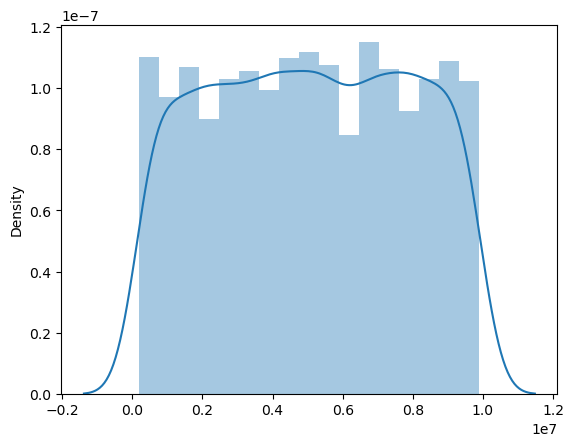

In [27]:
sns.distplot(x=df[' income_annum'])
plt.show()

In [28]:
df[' loan_amount'].nunique()

378

In [30]:
# df[' loan_amount'].unique()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\162217760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' loan_amount'])


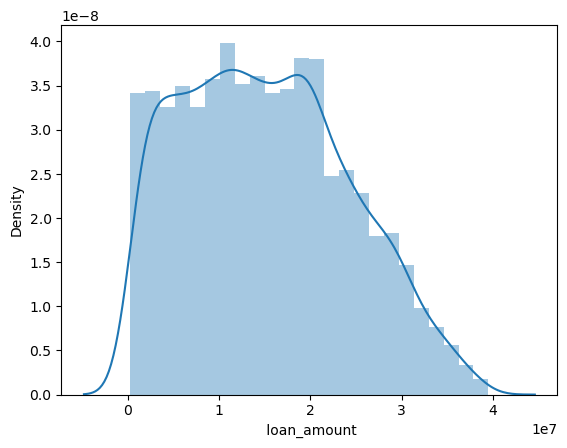

In [31]:
sns.distplot(df[' loan_amount'])
plt.show()

In [32]:
df[' loan_term'].nunique()

10

In [33]:
df[' loan_term'].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

In [39]:
import plotly.express as px
fig=px.histogram(df,x=df[' loan_term'],nbins=30,title="Loan Term Distribution")
fig.show()

In [40]:
df[' cibil_score'].nunique()

601

In [43]:
# df[' cibil_score'].unique()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\2655950409.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




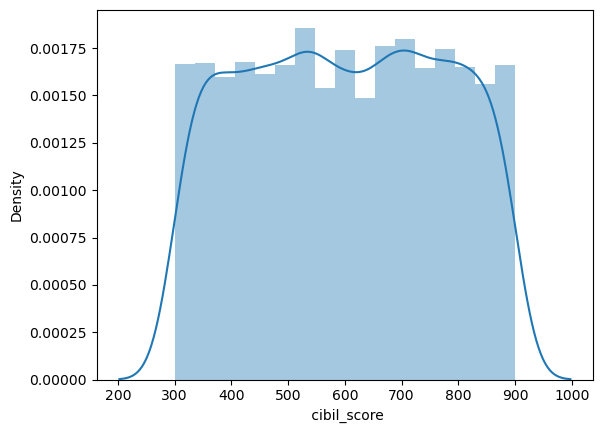

In [45]:
sns.distplot(df[' cibil_score'])
plt.show()

In [46]:
df[' residential_assets_value'].nunique()

278

In [48]:
# df[' residential_assets_value'].unique()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\1197037550.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




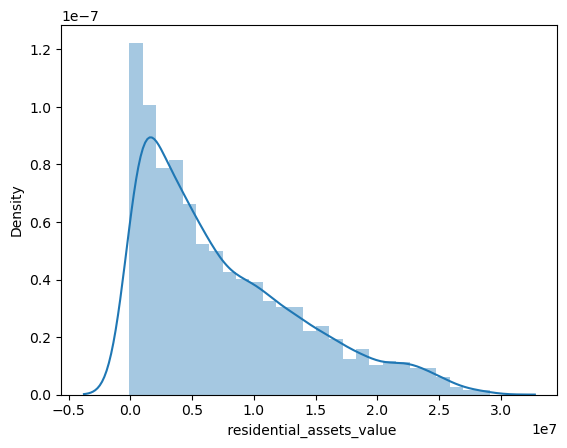

In [50]:
sns.distplot(df[' residential_assets_value'])
plt.show()

In [51]:
df[' commercial_assets_value'].nunique()

188

In [53]:
# df[' commercial_assets_value'].unique()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\268431795.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




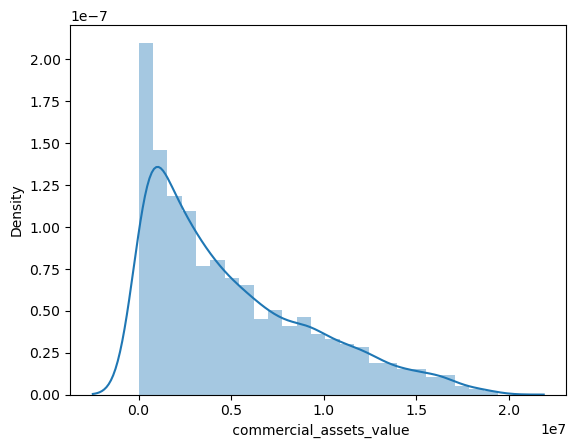

In [54]:
sns.distplot(df[' commercial_assets_value'])
plt.show()

In [55]:
df[' luxury_assets_value'].nunique()

379

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\38931760.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




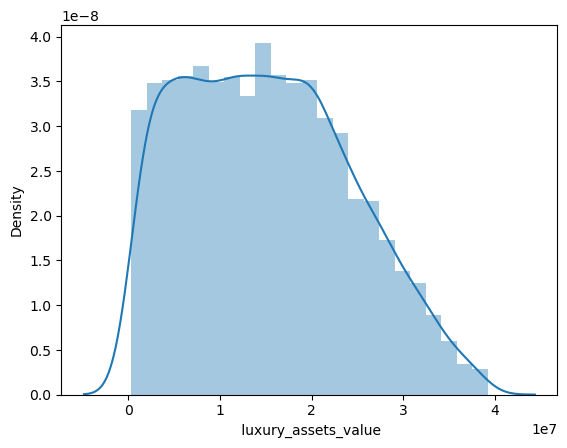

In [56]:
sns.distplot(df[' luxury_assets_value'])
plt.show()

In [57]:
df[' bank_asset_value'].nunique()

146

In [59]:
# df[' bank_asset_value'].unique()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\2747197036.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




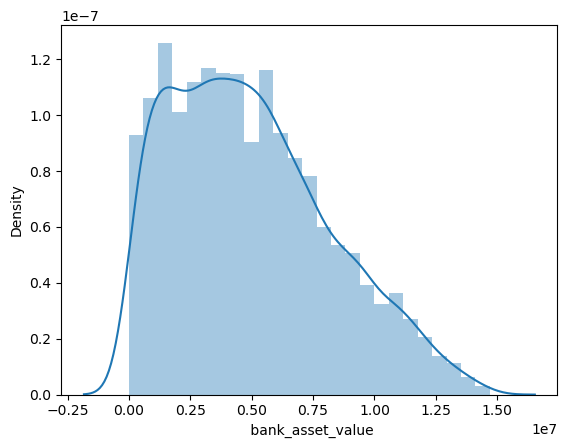

In [61]:
sns.distplot(df[' bank_asset_value'])
plt.show()

In [62]:
df[' loan_status'].nunique()

2

In [63]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [64]:
df[' loan_status'].value_counts(dropna=False)

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

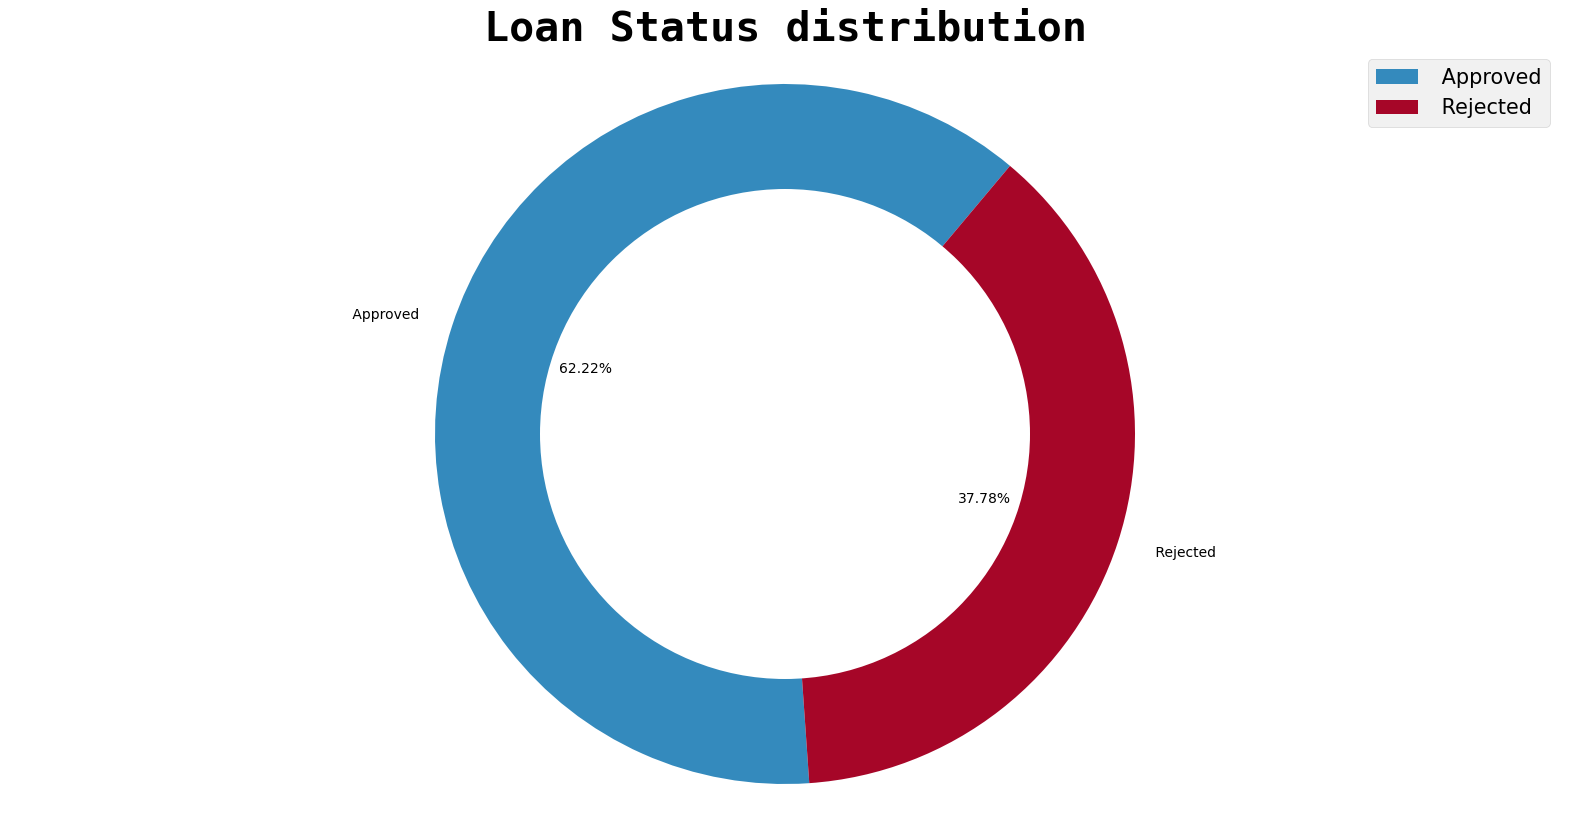

In [74]:
da=df[' loan_status'].value_counts(dropna=False)

plt.style.use("bmh")
plt.figure(figsize=(20,10))
plt.pie(x=da.values,labels=da.index,startangle=50,autopct="%1.2f%%")

centre_circle = plt.Circle((0,0),.7,fc="white")
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Loan Status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})

plt.show()

- There are only 62.22% of the people who get approved for the loan.
- And 37.78% who got rejected for the loan.

#### Numerical

In [76]:
df.describe(percentiles=(.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99)).T

count          mean           std       min  \
 no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
 income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
 loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
 loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
 cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
 residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
 commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
 luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
 bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                 1%         2%         3%          4%  \
 no_of_dependents               0.0        0.0        0.0        0.00   
 income_annum              300000.0   300000.0   500000.0   500000.00   
 loan_amount               700000.0  1000000.0  1204000.0  1500000.00   
 loan_term                      2.0        2.0        2.0        2.00   
 cibil_score                  304.0      311.0      317.0      322.72   
 residential_assets_value       0.0   100000.0   100000.0   200000.00   
 commercial_assets_value        0.0        0.0   100000.0   100000.00   
 luxury_assets_value       700000.0  1000000.0  1300000.0  1600000.00   
 bank_asset_value          200000.0   200000.0   300000.0   400000.00   

                                  5%        10%        25%         50%  \
 no_of_dependents                0.0        0.0        1.0         3.0   
 income_annum               600000.0  1100000.0  2700000.0   5100000.0   
 loan_amount               1800000.0  3200000.0  7700000.0  14500000.0   
 loan_term                       2.0        4.0        6.0        10.0   
 cibil_score                   330.0      360.0      453.0       600.0   
 residential_assets_value   300000.0   700000.0  2200000.0   5600000.0   
 commercial_assets_value    200000.0   400000.0  1300000.0   3700000.0   
 luxury_assets_value       1900000.0  3200000.0  7500000.0  14600000.0   
 bank_asset_value           500000.0  1000000.0  2300000.0   4600000.0   

                                  75%         90%         95%         96%  \
 no_of_dependents                 4.0         5.0         5.0         5.0   
 income_annum               7500000.0   8900000.0   9400000.0   9500000.0   
 loan_amount               21500000.0  28000000.0  30900000.0  31800000.0   
 loan_term                       16.0        18.0        20.0        20.0   
 cibil_score                    748.0       837.0       869.0       876.0   
 residential_assets_value  11300000.0  17200000.0  21260000.0  22000000.0   
 commercial_assets_value    7600000.0  11700000.0  13900000.0  14600000.0   
 luxury_assets_value       21700000.0  27720000.0  31300000.0  32000000.0   
 bank_asset_value           7100000.0   9700000.0  11100000.0  11428000.0   

                                  97%         98%          99%         max  
 no_of_dependents                 5.0         5.0         5.00         5.0  
 income_annum               9600000.0   9700000.0   9800000.00   9900000.0  
 loan_amount               32900000.0  34164000.0  35700000.00  39500000.0  
 loan_term                       20.0        20.0        20.00        20.0  
 cibil_score                    883.0       888.0       894.32       900.0  
 residential_assets_value  22900000.0  23964000.0  25400000.00  29100000.0  
 commercial_assets_value   15296000.0  16100000.0  16732000.00  19400000.0  
 luxury_assets_value       33000000.0  34400000.0  36032000.00  39200000.0  
 bank_asset_value          11900000.0  12400000.0  13100000.00  14700000.0

## BiVariate Analysis

##### CAT-NUM

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [78]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

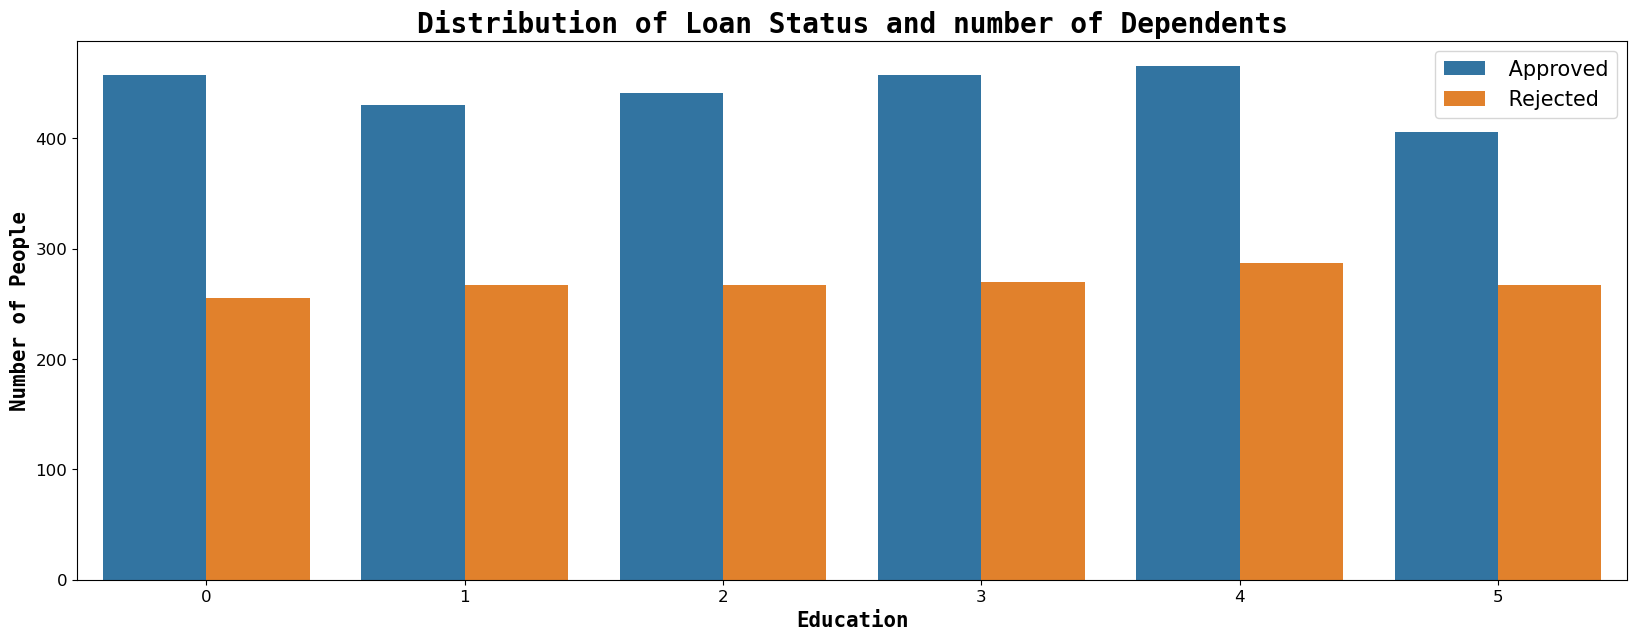

In [86]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' no_of_dependents',data=df,hue=' loan_status')
plt.title("Distribution of Loan Status and number of Dependents",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Education",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

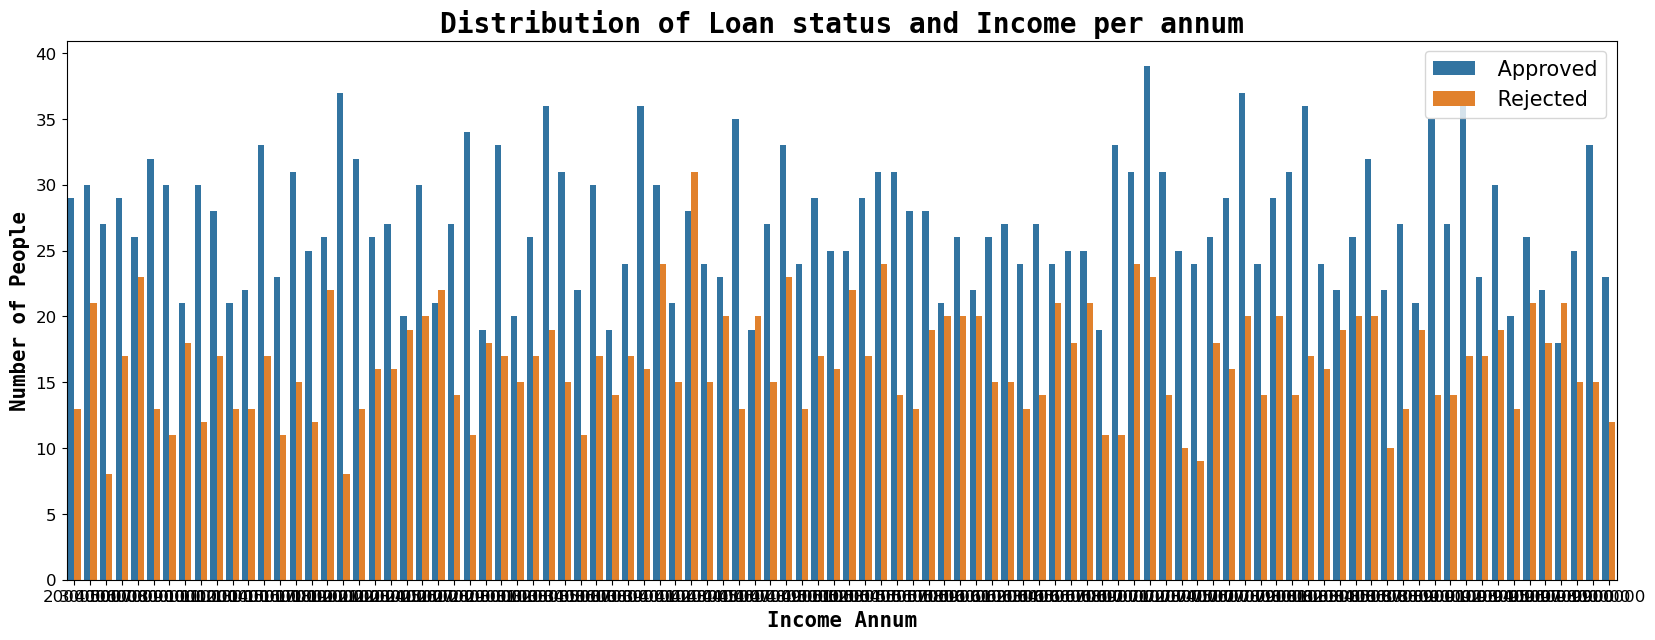

In [88]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' income_annum',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Income per annum",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Income Annum",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

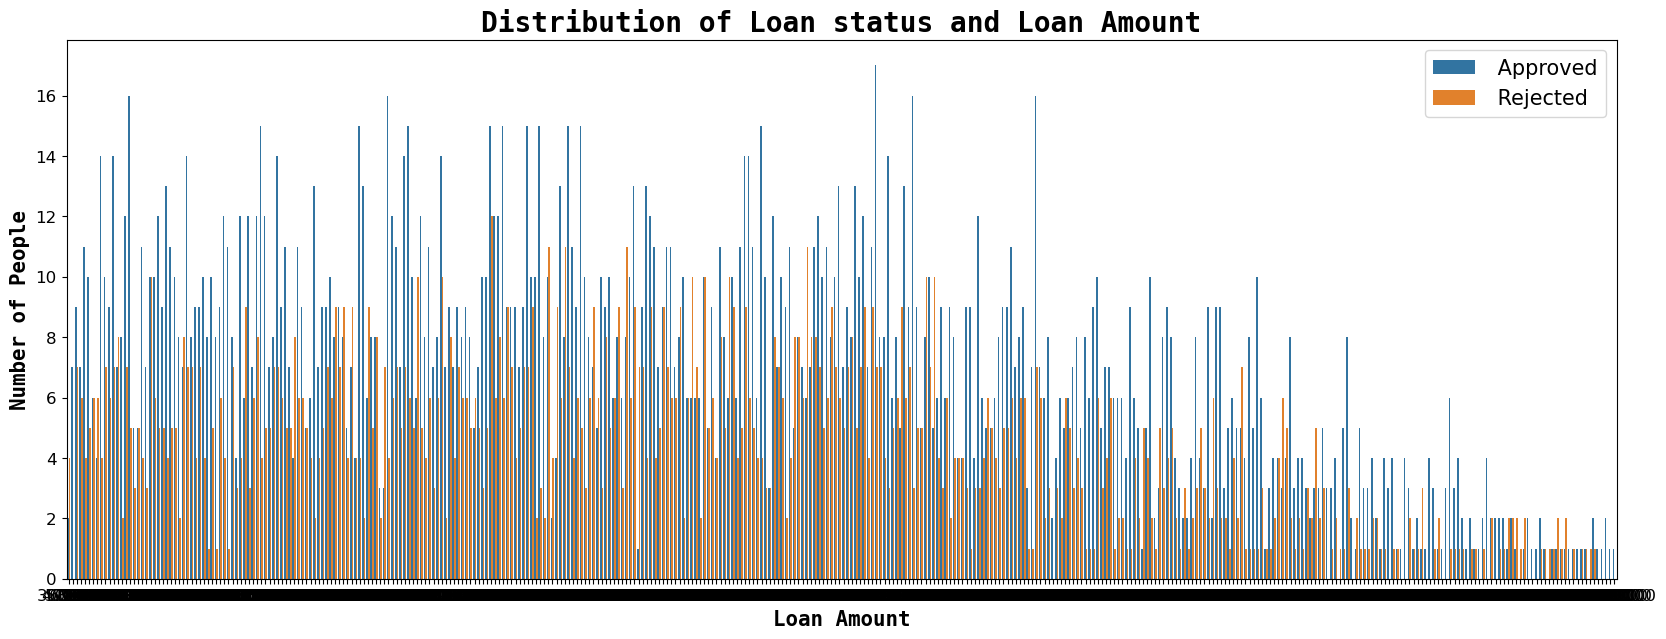

In [89]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' loan_amount',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Loan Amount",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Loan Amount",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

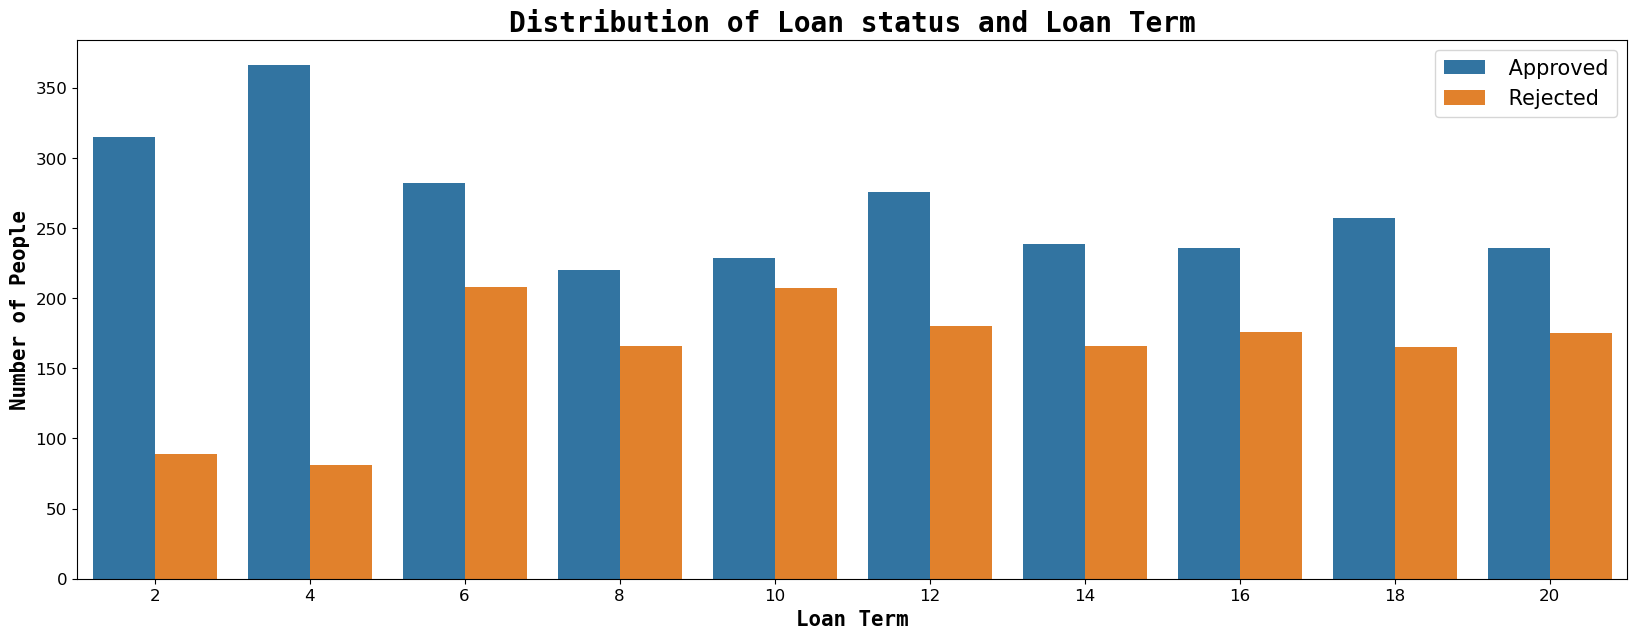

In [90]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' loan_term',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Loan Term",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Loan Term",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

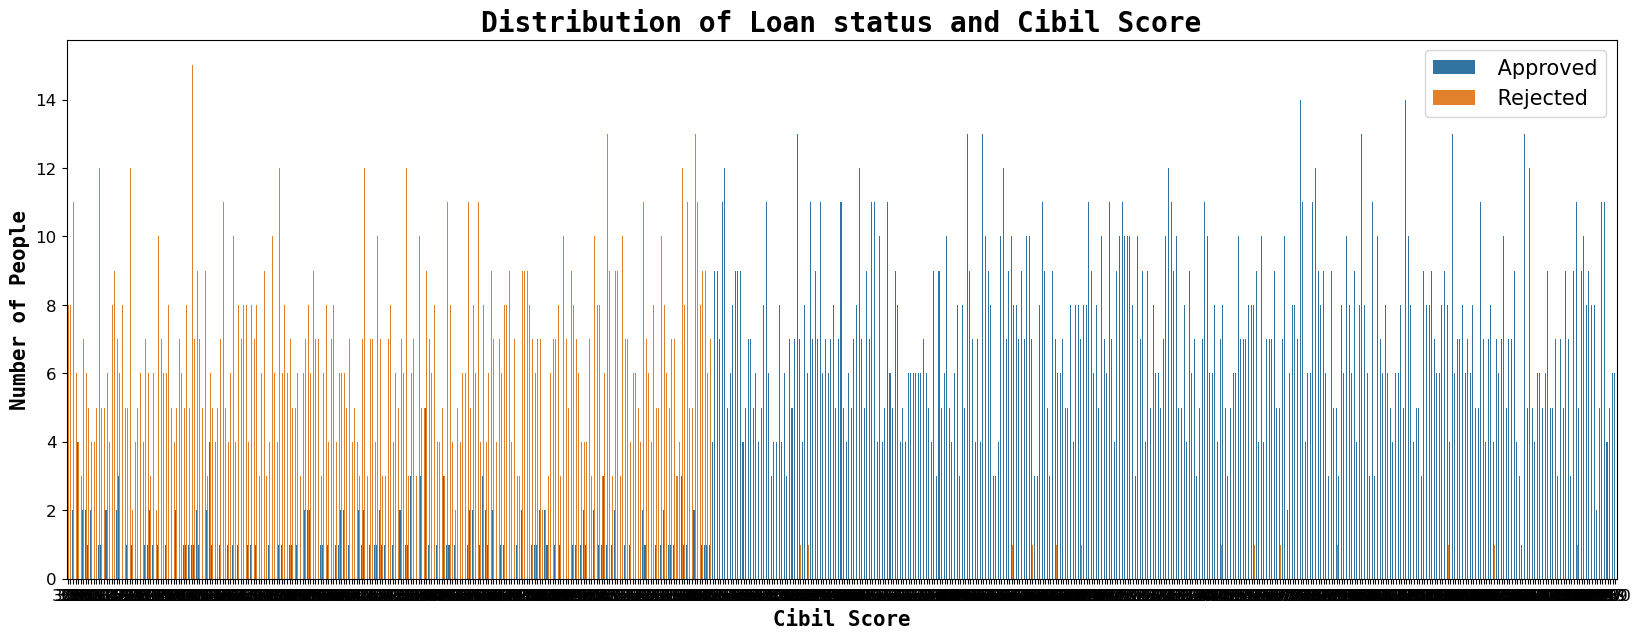

In [94]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' cibil_score',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Cibil Score",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Cibil Score",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

- It can be seen that persons with lower Cibil Score are higher chance of rejection.

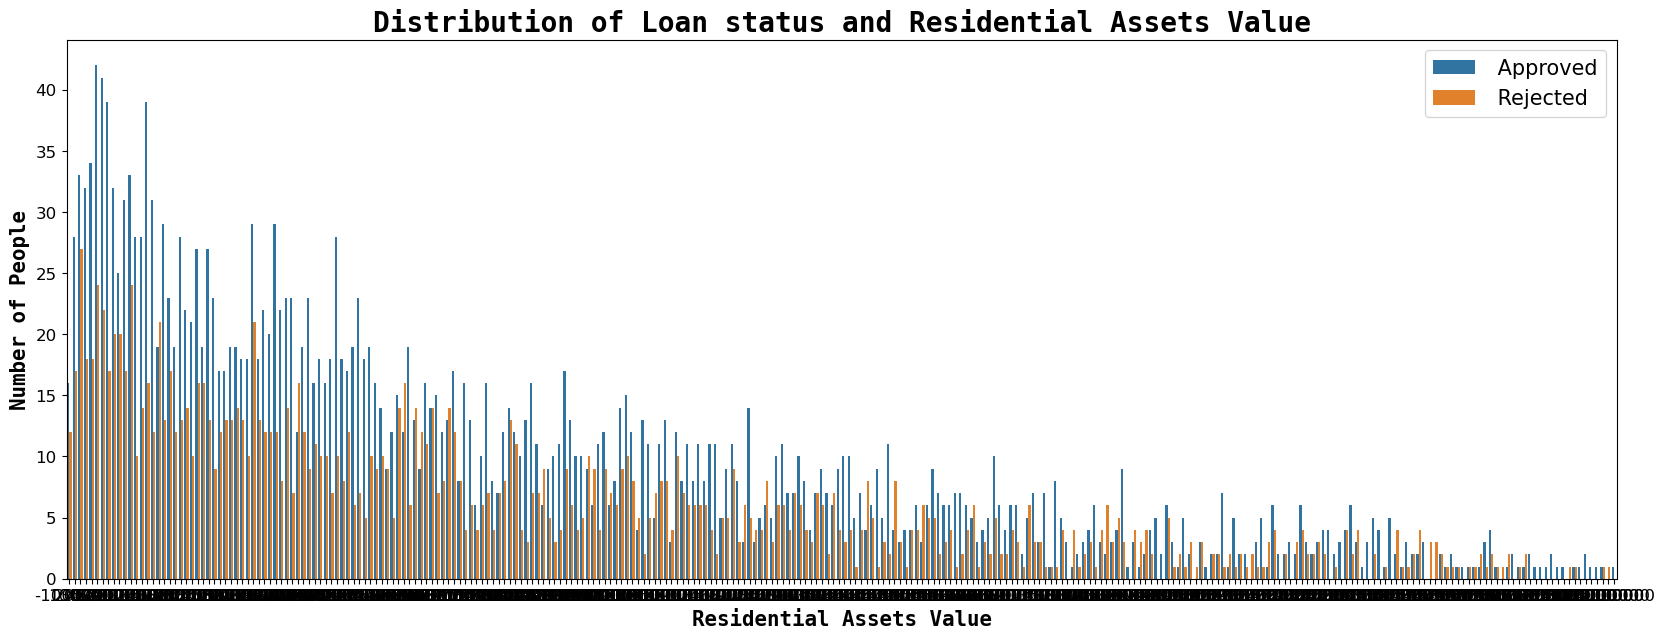

In [95]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' residential_assets_value',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Residential Assets Value",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Residential Assets Value",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

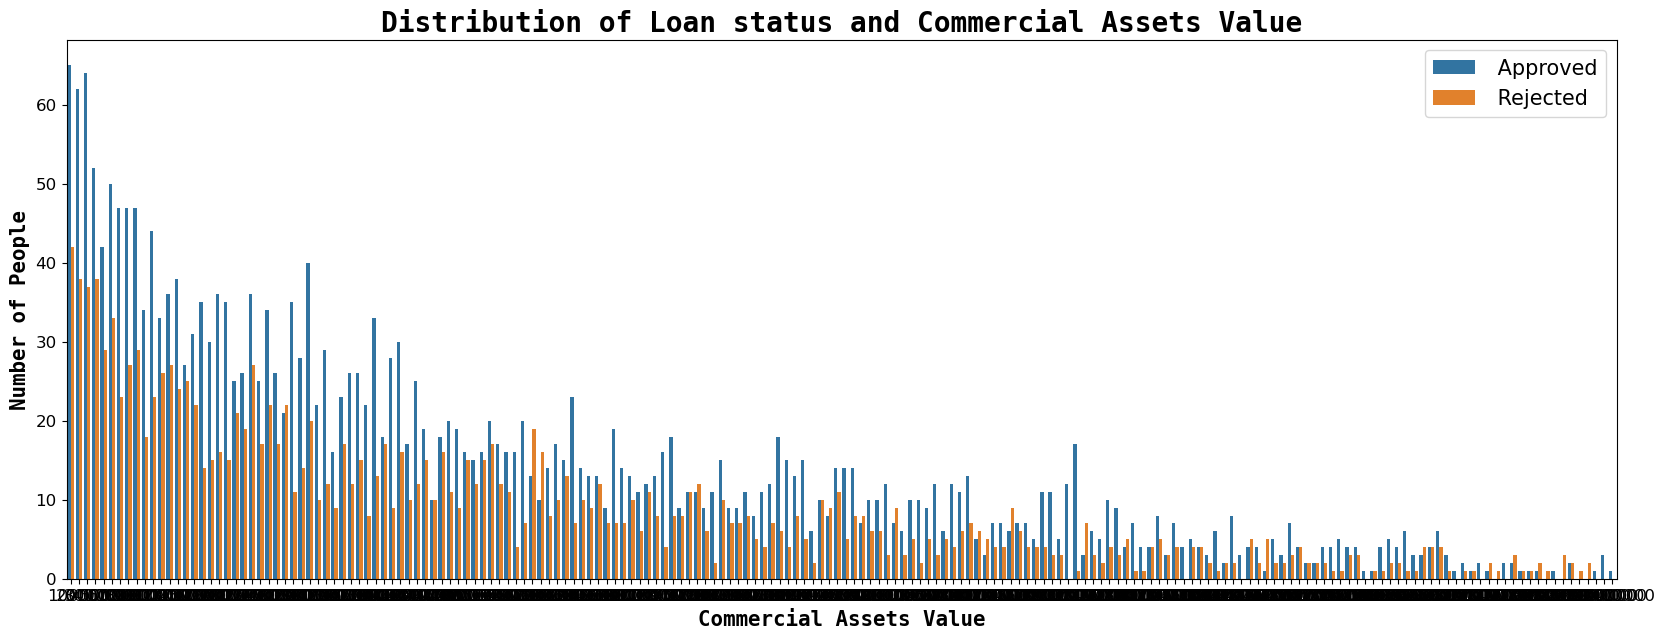

In [96]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' commercial_assets_value',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Commercial Assets Value",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Commercial Assets Value",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

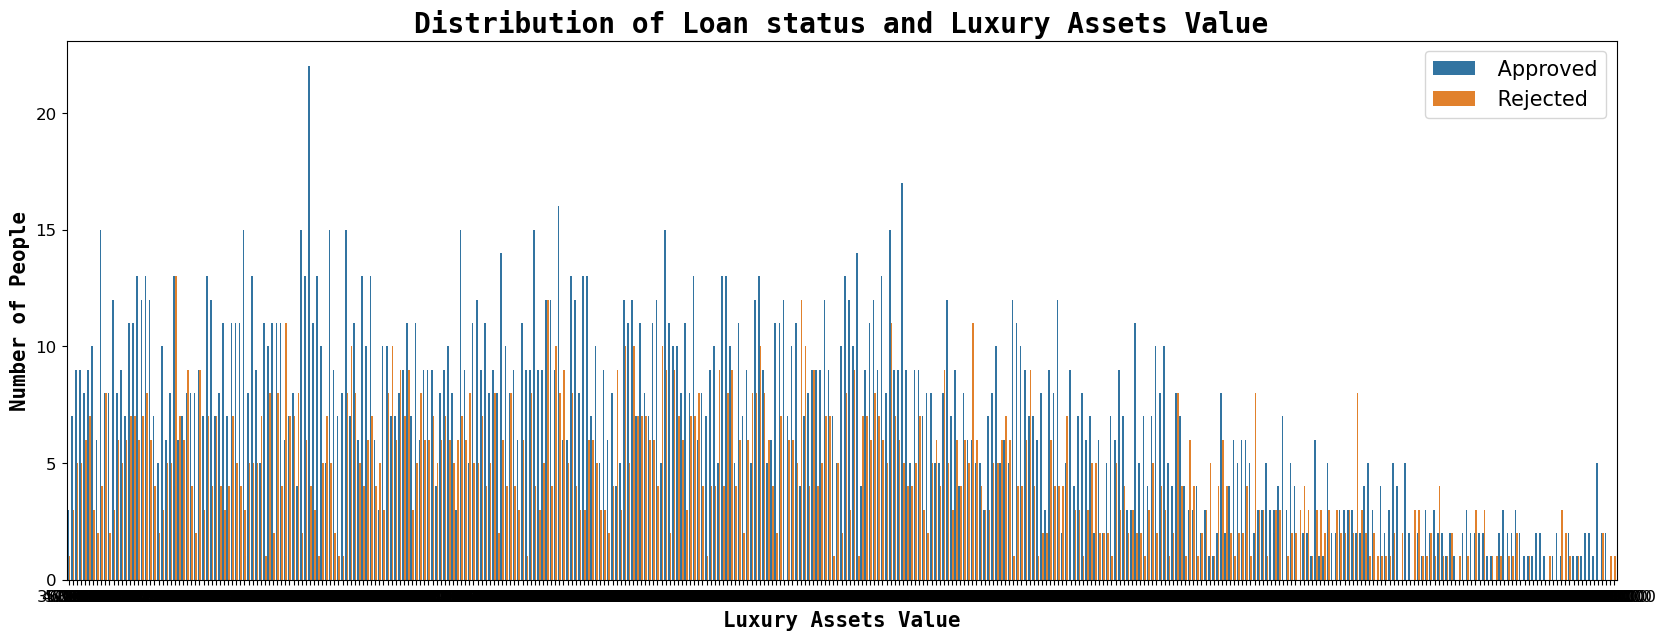

In [97]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' luxury_assets_value',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Luxury Assets Value",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Luxury Assets Value",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

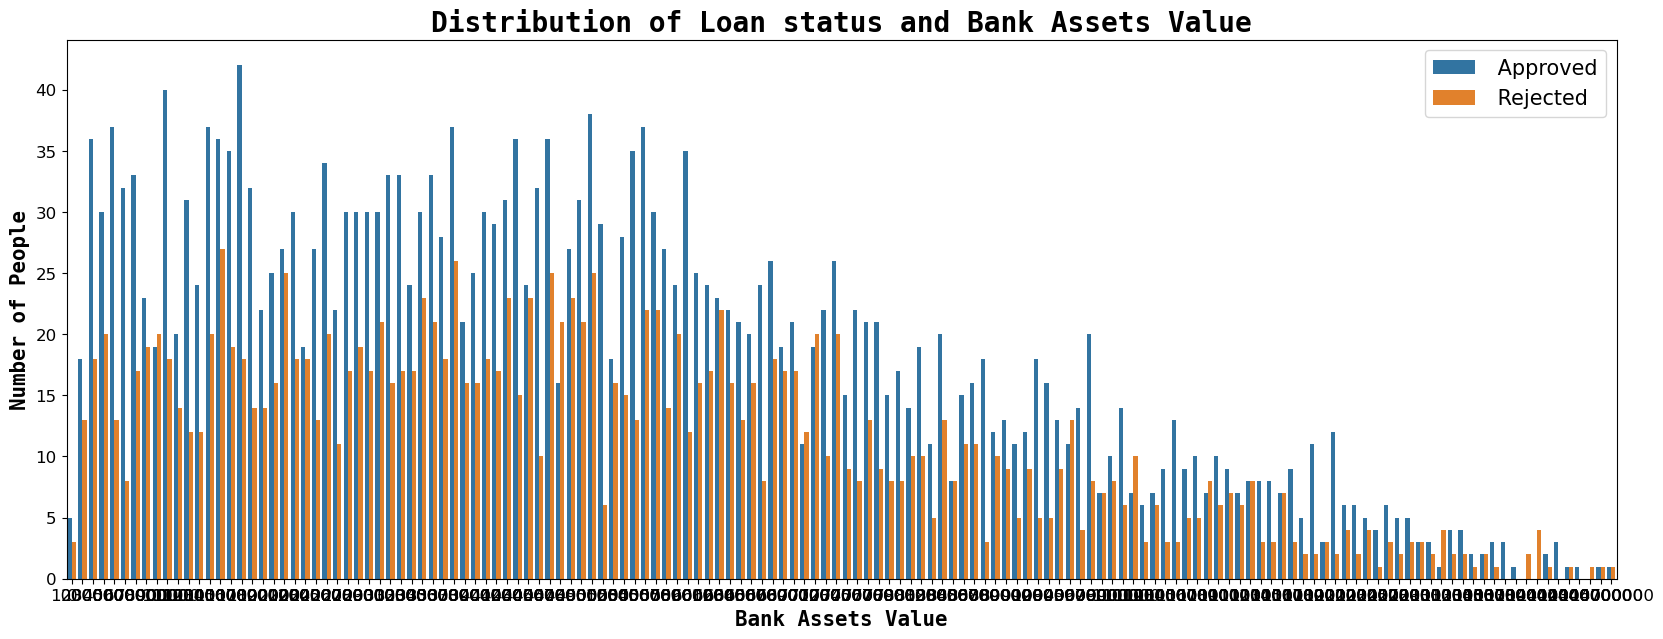

In [100]:
plt.style.use("default")
plt.figure(figsize=(20,7))
sns.countplot(x=' bank_asset_value',data=df,hue=" loan_status")
plt.title("Distribution of Loan status and Bank Assets Value",fontdict={
    "fontname":"Monospace","fontsize":20,"fontweight":"bold"})
plt.xlabel("Bank Assets Value",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})
plt.ylabel("Number of People",fontdict={"fontname":"Monospace","fontsize":15,"fontweight":"bold"})

plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={"size":15})
plt.show()

### MultiVariate Analysis

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
df1=df.copy()

In [112]:
cols=[' education',' self_employed',' loan_status']
for i in cols:
    df1[i]=le.fit_transform(df1[i])

In [114]:
df1[[' education',' self_employed',' loan_status']].value_counts()

 education   self_employed   loan_status
0           0               0               681
1           1               0               680
0           1               0               658
1           0               0               637
            1               1               415
0           0               1               408
            1               1               397
1           0               1               393
dtype: int64

In [115]:
df[[' education',' self_employed',' loan_status']].value_counts()

 education      self_employed   loan_status
 Graduate       No              Approved       681
 Not Graduate   Yes             Approved       680
 Graduate       Yes             Approved       658
 Not Graduate   No              Approved       637
                Yes             Rejected       415
 Graduate       No              Rejected       408
                Yes             Rejected       397
 Not Graduate   No              Rejected       393
dtype: int64

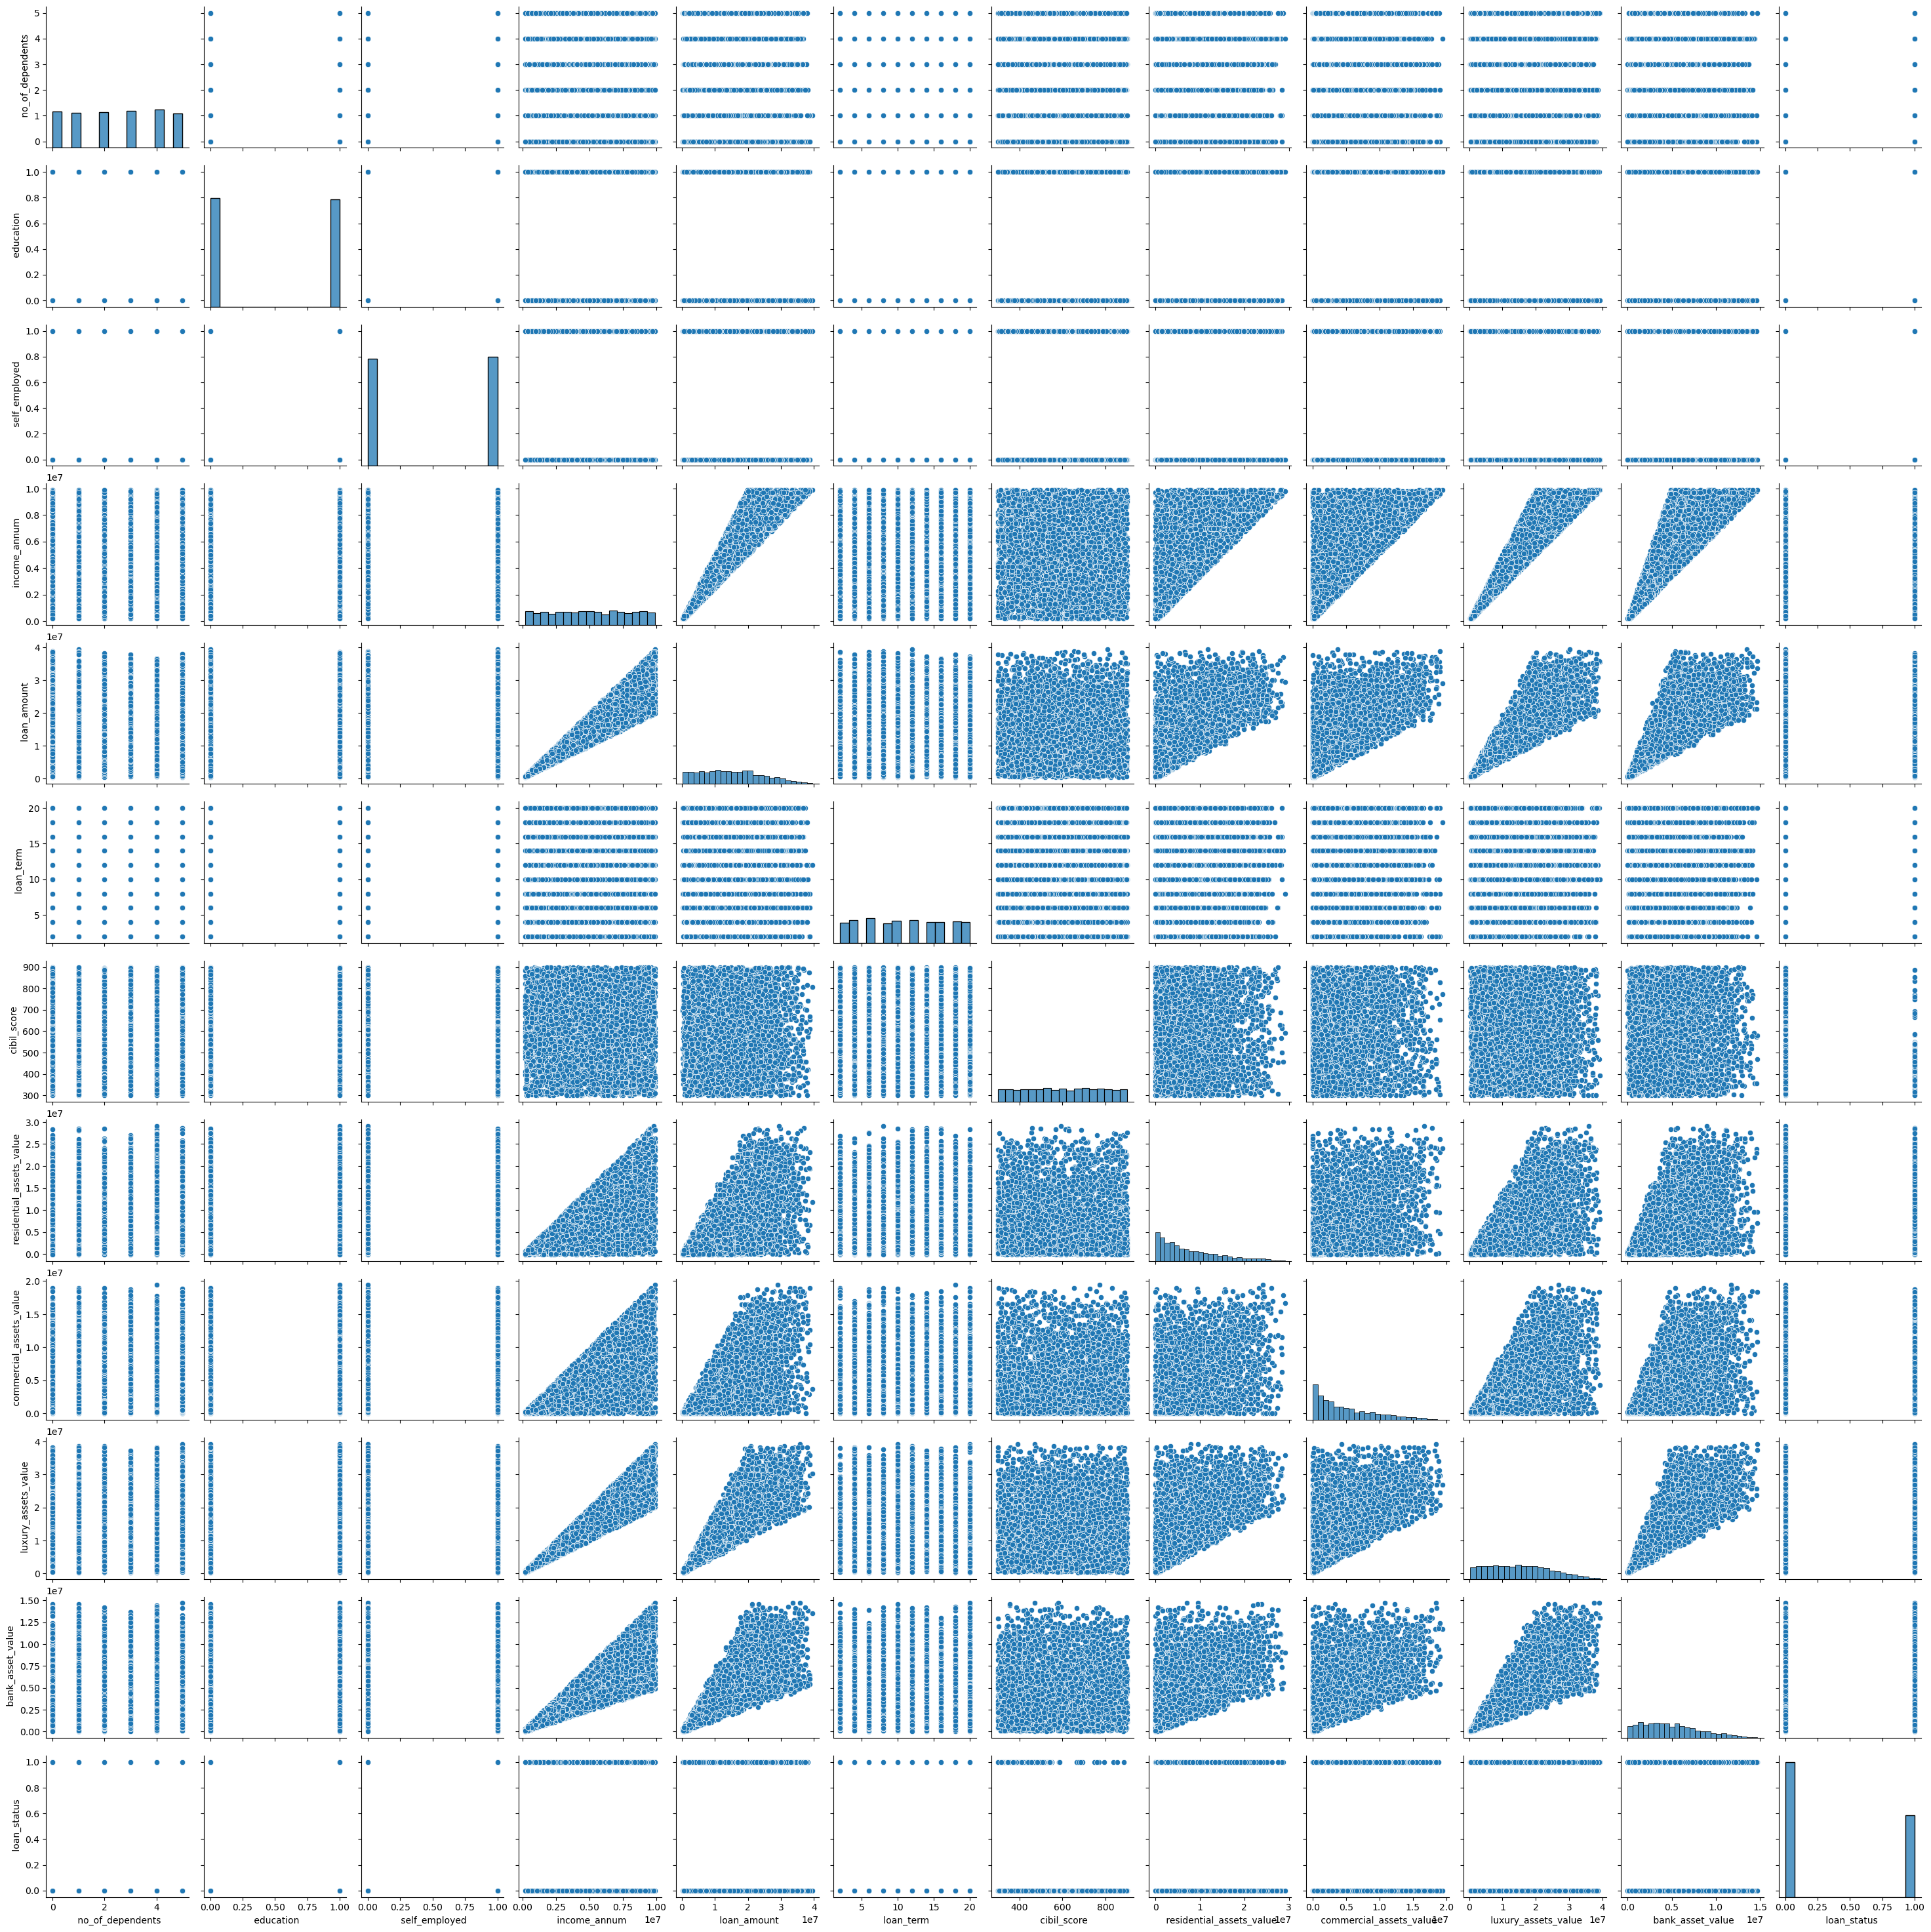

In [119]:
sns.pairplot(df1)
plt.show()

#### Outlier Treatment

In [122]:
var=[' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status']

for i in var:
    q1=df1[i].quantile(.25)
    q3=df1[i].quantile(.75)
    iqr=q3-q1
    
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    df1[i]=np.where(df1[i]>upper_bound,upper_bound,df1[i])
    df1[i]=np.where(df1[i]<=lower_bound,lower_bound,df1[i])

### Feature Engineering

In [126]:
x=df1.drop(columns=" loan_status")
y=df1[" loan_status"]

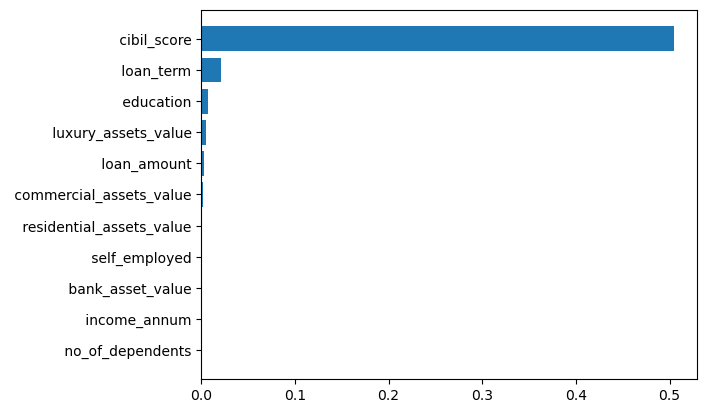

In [127]:
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(x,y)
m1=pd.DataFrame({"features":x.columns,"imp":imp}).sort_values(by=["imp"],ascending=True)
plt.barh(y=m1["features"],width=m1["imp"])
plt.show()

In [128]:
m1[m1["imp"]>0]["features"].values

array([' self_employed', ' residential_assets_value',
       ' commercial_assets_value', ' loan_amount', ' luxury_assets_value',
       ' education', ' loan_term', ' cibil_score'], dtype=object)

In [148]:
x=df1[[' luxury_assets_value',
       ' education', ' loan_term', ' cibil_score']]
y=df1[" loan_status"]

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [150]:
logR=LogisticRegression()

In [151]:
logR.fit(x_train,y_train)

LogisticRegression()

In [152]:
logR.score(x_train,y_train)

0.7054886211512718

In [156]:
print("Accuracy Train:", str(round(logR.score(x_train,y_train)*100,2))+str("%"))

Accuracy Train: 70.55%


In [157]:
print("Accuracy Test:", str(round(logR.score(x_test,y_test)*100,2))+str("%"))

Accuracy Test: 70.49%


In [158]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [159]:
pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [160]:
pd.DataFrame({"Actual":y_train,"Predicted":pred_train}).head(15)

Actual  Predicted
1023     0.0        0.0
728      1.0        0.0
133      1.0        1.0
2255     1.0        1.0
1044     0.0        0.0
366      0.0        0.0
1927     0.0        0.0
3594     0.0        0.0
1140     0.0        0.0
3773     0.0        1.0
259      0.0        0.0
2180     0.0        0.0
2487     0.0        0.0
3379     1.0        0.0
2678     0.0        0.0

In [161]:
pd.DataFrame({"Actual":y_test,"Predicted":pred_test}).head(15)

Actual  Predicted
1972     0.0        0.0
528      0.0        0.0
3540     0.0        0.0
87       1.0        1.0
1621     1.0        1.0
1949     1.0        1.0
520      0.0        0.0
1715     0.0        0.0
3994     0.0        0.0
2369     1.0        1.0
125      0.0        0.0
2714     0.0        0.0
3804     1.0        1.0
4228     1.0        0.0
3176     1.0        0.0

In [163]:
pd.DataFrame(metrics.confusion_matrix(y_train,pred_train), index=["Act0","Act1"],columns=["Pred0","Pred1"])

Pred0  Pred1
Act0   1775    106
Act1    774    333

In [164]:
pd.DataFrame(metrics.confusion_matrix(y_test,pred_test),index=["Act0","Act1"],columns=["Pred0","Pred1"])

Pred0  Pred1
Act0    734     41
Act1    337    169

In [165]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80      1881
         1.0       0.76      0.30      0.43      1107

    accuracy                           0.71      2988
   macro avg       0.73      0.62      0.62      2988
weighted avg       0.72      0.71      0.66      2988



In [166]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.69      0.95      0.80       775
         1.0       0.80      0.33      0.47       506

    accuracy                           0.70      1281
   macro avg       0.75      0.64      0.63      1281
weighted avg       0.73      0.70      0.67      1281



In [167]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=["Prob0","Prob1"])
prob_train

Prob0     Prob1
0     0.840677  0.159323
1     0.618646  0.381354
2     0.447827  0.552173
3     0.329620  0.670380
4     0.933191  0.066809
...        ...       ...
2983  0.924180  0.075820
2984  0.742521  0.257479
2985  0.633809  0.366191
2986  0.773950  0.226050
2987  0.791846  0.208154

[2988 rows x 2 columns]

In [169]:
prob_test=pd.DataFrame(logR.predict_proba(x_test),columns=["Prob0","Prob1"])
prob_test

Prob0     Prob1
0     0.563816  0.436184
1     0.659761  0.340239
2     0.638045  0.361955
3     0.343754  0.656246
4     0.435181  0.564819
...        ...       ...
1276  0.919445  0.080555
1277  0.864331  0.135669
1278  0.936008  0.063992
1279  0.835353  0.164647
1280  0.724170  0.275830

[1281 rows x 2 columns]

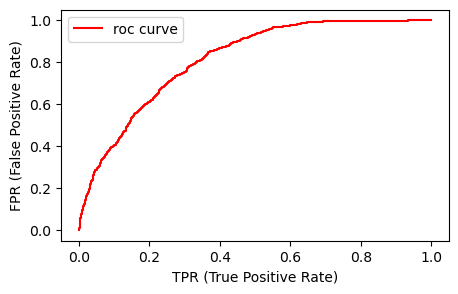

In [170]:
tpr,fpr,threshold= metrics.roc_curve(y_train,prob_train["Prob1"])
plt.figure(figsize=(5,3))
plt.plot(tpr,fpr,color="r",label="roc curve")
plt.xlabel("TPR (True Positive Rate)")
plt.ylabel("FPR (False Positive Rate)")
plt.legend()
plt.show()

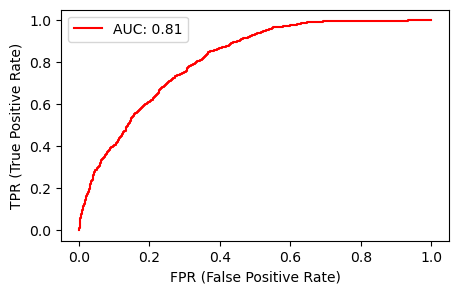

In [172]:
fpr,tpr,threshold= metrics.roc_curve(y_train,prob_train["Prob1"])
auc=metrics.roc_auc_score(y_train,prob_train["Prob1"])
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr,color="r",label="AUC: "+str(round(auc,2)))
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()
plt.show()

In [173]:
new_pred_train=np.where(prob_train["Prob1"]>.25,1,0)
new_pred_test=np.where(prob_test["Prob1"]>.25,1,0)

In [175]:
print(metrics.classification_report(y_train,new_pred_train))
print(metrics.classification_report(y_test,new_pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.74      1881
         1.0       0.58      0.83      0.68      1107

    accuracy                           0.71      2988
   macro avg       0.72      0.74      0.71      2988
weighted avg       0.76      0.71      0.72      2988

              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75       775
         1.0       0.62      0.84      0.71       506

    accuracy                           0.73      1281
   macro avg       0.74      0.75      0.73      1281
weighted avg       0.77      0.73      0.73      1281



In [176]:
x_train.columns

Index([' luxury_assets_value', ' education', ' loan_term', ' cibil_score'], dtype='object')

In [177]:
new=pd.read_excel(r"D:\Projects\ML\loan_approval_dataset\loandatatest.xlsx")

In [178]:
new

loan_id   no_of_dependents      education  self_employed   income_annum  \
0         1                  2       Graduate             No        9600000   
1         2                  0   Not Graduate            Yes        4100000   
2         3                  3       Graduate             No        9100000   
3         4                  3       Graduate             No        8200000   
4         5                  5   Not Graduate            Yes        9800000   
5         6                  0       Graduate            Yes        4800000   
6         7                  5       Graduate             No        8700000   
7         8                  2       Graduate            Yes        5700000   
8         9                  0       Graduate            Yes         800000   
9        10                  5   Not Graduate             No        1100000   
10     4265                  5       Graduate            Yes        1000000   
11     4266                  0   Not Graduate            Yes        3300000   
12     4267                  2   Not Graduate             No        6500000   
13     4268                  1   Not Graduate             No        4100000   
14     4269                  1       Graduate             No        9200000   

     loan_amount   loan_term   cibil_score   residential_assets_value  \
0       29900000          12           778                    2400000   
1       12200000           8           417                    2700000   
2       29700000          20           506                    7100000   
3       30700000           8           467                   18200000   
4       24200000          20           382                   12400000   
5       13500000          10           319                    6800000   
6       33000000           4           678                   22500000   
7       15000000          20           382                   13200000   
8        2200000          20           782                    1300000   
9        4300000          10           388                    3200000   
10       2300000          12           317                    2800000   
11      11300000          20           559                    4200000   
12      23900000          18           457                    1200000   
13      12800000           8           780                    8200000   
14      29700000          10           607                   17800000   

     commercial_assets_value   luxury_assets_value   bank_asset_value  
0                   17600000              22700000            8000000  
1                    2200000               8800000            3300000  
2                    4500000              33300000           12800000  
3                    3300000              23300000            7900000  
4                    8200000              29400000            5000000  
5                    8300000              13700000            5100000  
6                   14800000              29200000            4300000  
7                    5700000              11800000            6000000  
8                     800000               2800000             600000  
9                    1400000               3300000            1600000  
10                    500000               3300000             800000  
11                   2900000              11000000            1900000  
12                  12400000              18100000            7300000  
13                    700000              14100000            5800000  
14                  11800000              35700000           12000000

In [179]:
new_df=new[[' luxury_assets_value', ' education', ' loan_term', ' cibil_score']]

In [180]:
new_df

luxury_assets_value      education   loan_term   cibil_score
0               22700000       Graduate          12           778
1                8800000   Not Graduate           8           417
2               33300000       Graduate          20           506
3               23300000       Graduate           8           467
4               29400000   Not Graduate          20           382
5               13700000       Graduate          10           319
6               29200000       Graduate           4           678
7               11800000       Graduate          20           382
8                2800000       Graduate          20           782
9                3300000   Not Graduate          10           388
10               3300000       Graduate          12           317
11              11000000   Not Graduate          20           559
12              18100000   Not Graduate          18           457
13              14100000   Not Graduate           8           780
14              35700000       Graduate          10           607

In [181]:
for i in new_df.columns:
    if new_df[i].dtypes=="object":
        encoder=LabelEncoder()
        new_df[i]=encoder.fit_transform(new_df[i])

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\4001675252.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
pd.DataFrame(logR.predict_proba(new_df),columns=["Prob0","Prob1"])

Prob0     Prob1
0   0.745715  0.254285
1   0.695732  0.304268
2   0.336558  0.663442
3   0.481606  0.518394
4   0.303820  0.696180
5   0.528598  0.471402
6   0.559030  0.440970
7   0.617667  0.382333
8   0.928905  0.071095
9   0.756401  0.243599
10  0.706991  0.293009
11  0.762777  0.237223
12  0.568957  0.431043
13  0.848454  0.151546
14  0.377924  0.622076

In [184]:
new_prob = pd.DataFrame(logR.predict_proba(new_df),columns=["Prob0","Prob1"])

In [196]:
pred_new_status=np.where(new_prob["Prob1"]>=.35,1,0)

In [197]:
new_df.loc[:,"STATUS"]=pred_new_status

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_33200\4205649271.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
new_df

luxury_assets_value   education   loan_term   cibil_score  STATUS
0               22700000           0          12           778       0
1                8800000           1           8           417       0
2               33300000           0          20           506       1
3               23300000           0           8           467       1
4               29400000           1          20           382       1
5               13700000           0          10           319       1
6               29200000           0           4           678       1
7               11800000           0          20           382       1
8                2800000           0          20           782       0
9                3300000           1          10           388       0
10               3300000           0          12           317       0
11              11000000           1          20           559       0
12              18100000           1          18           457       1
13              14100000           1           8           780       0
14              35700000           0          10           607       1

In [200]:
df[" loan_status"].head(10)

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
5     Rejected
6     Approved
7     Rejected
8     Approved
9     Rejected
Name:  loan_status, dtype: object